/Users/arunpannala12/env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.6950 - loss: 0.5963 - val_binary_accuracy: 0.8219 - val_loss: 0.4283
Epoch 2/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.8891 - loss: 0.3455 - val_binary_accuracy: 0.8852 - val_loss: 0.3125
Epoch 3/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - binary_accuracy: 0.9235 - loss: 0.2421 - val_binary_accuracy: 0.8904 - val_loss: 0.2807
Epoch 4/4
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - binary_accuracy: 0.9372 - loss: 0.1922 - val_binary_accuracy: 0.8900 - val_loss: 0.2741


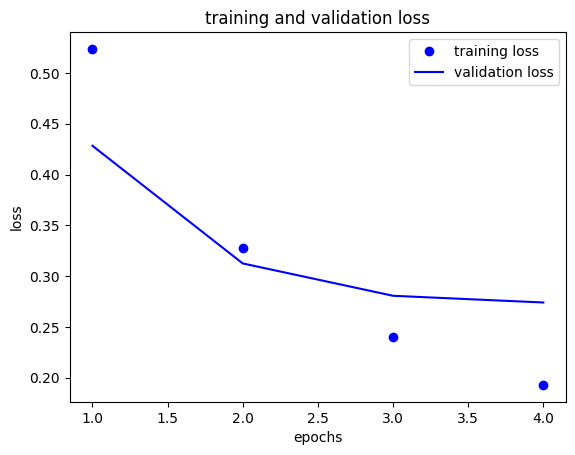

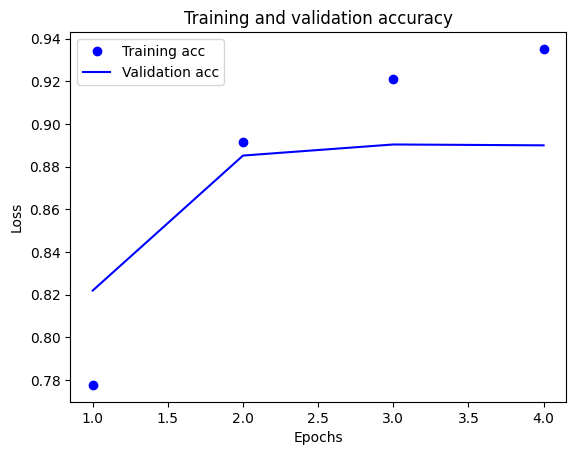

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - binary_accuracy: 0.8818 - loss: 0.2904
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step


array([[0.22001888],
       [0.9995742 ],
       [0.9346433 ],
       ...,
       [0.10490666],
       [0.17087683],
       [0.6286292 ]], dtype=float32)

In [2]:
from keras.datasets import imdb
from keras import models 
from keras import layers 
from keras import optimizers 
from keras import losses 
from keras import metrics 
import matplotlib.pyplot as plt
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

def vectorize_seuqences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. 
    return results 
x_train = vectorize_seuqences(train_data)
x_test = vectorize_seuqences(test_data)

y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

#two intermediate layers with 16 hidden units each 
#a third layer which will output the scalar prediction regarding the sentiment of the current review
#using sigmoid here as better suited for binary classification 

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


#create validation set by setting apart 10,000 samples from the original training_data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#since the output is a probability (end the network with a single-unit layer with a sigmoid activation),
#better to use binary_crossentropy loss or mean_squared_error and rsmprop optimizer.
model.compile(optimizer = optimizers.RMSprop(learning_rate = 0.001), 
              loss = 'binary_crossentropy', 
              metrics = [metrics.binary_accuracy]
             )

history = model.fit(
            partial_x_train, 
            partial_y_train,
            epochs = 4, 
            batch_size = 512, 
            validation_data = (x_val, y_val))

history_dict = history.history 
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

history_dict.keys()
# training loss steadily decreases - validation loss steadily increases
plt.plot(epochs, loss_values, 'bo', label = 'training loss') #bo = blue dot
plt.plot(epochs, val_loss_values, 'b', label = 'validation loss') #b - solid blue line 
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.clf() #clear figure 
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#overfitting - model is performing better on training data but not on test data
#modified epochs to 4 from 20 
#To do: try additional or fewer hidden layers, adjust units, try MSE loss and tanh activation instead of relu
results = model.evaluate(x_test, y_test)
results
model.predict(x_test)